<div align="center">

# *🍫CHOCOLATE🍫*

</div>

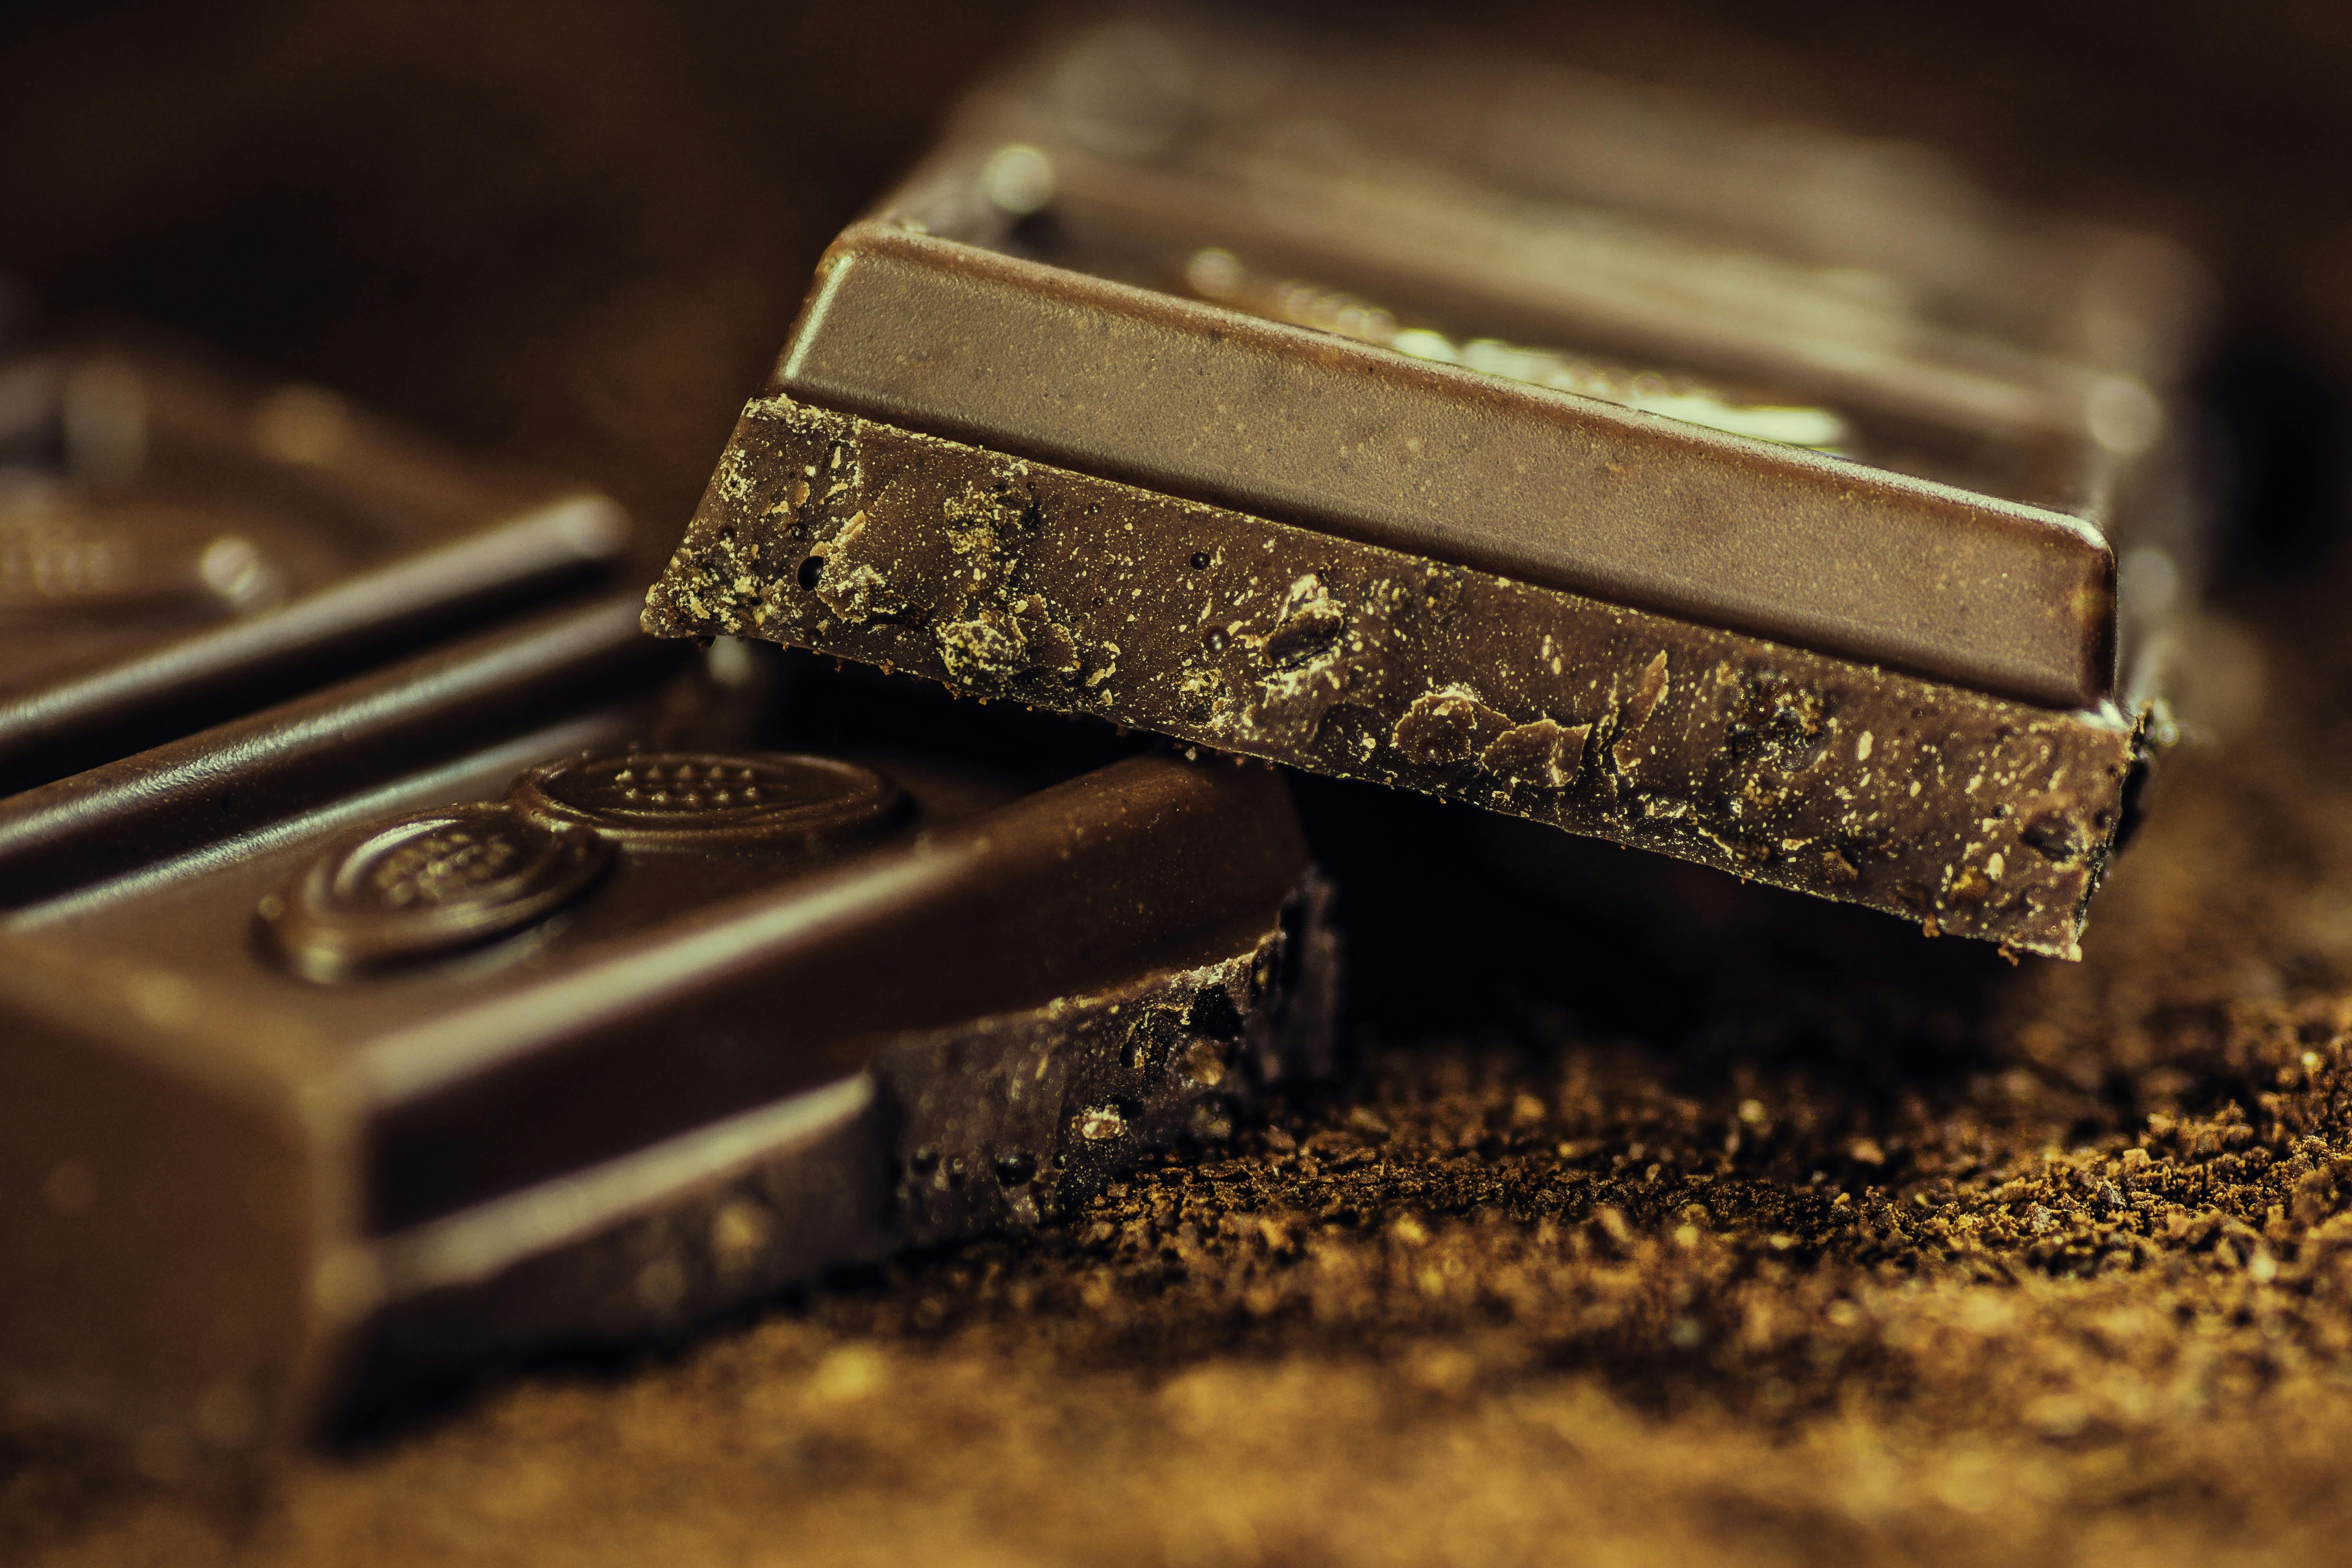

In [161]:
from IPython.display import Image, display
display(Image('images/img1.jpg', width=800, height=400))

The goal is to:
1. Clean and preprocess the dataset
2. Uncover patterns
3. Perform statistical analysis to test hypotheses about sales patterns
4. Cluster salespeople based on performance metrics to identify distinct profiles.
5. Build a time-series model to forecast monthly sales.
6. Create interactive tools to explore sales dynamics.


The table below represents the first 10 rows of the dataset. There are 6 columns, column names contain uppercase and spaces which needs to be corrected for smoother analysis.

In [162]:
import pandas as pd

df = pd.read_csv('Chocolate Sales Dataset.csv')
df.head(10)

Sales Person      Country              Product       Date  Amount  \
0   Jehu Rudeforth           UK      Mint Chip Choco   4-Jan-22    5320   
1      Van Tuxwell        India        85% Dark Bars   1-Aug-22    7896   
2     Gigi Bohling        India  Peanut Butter Cubes   7-Jul-22    4501   
3     Jan Morforth    Australia  Peanut Butter Cubes  27-Apr-22   12726   
4   Jehu Rudeforth           UK  Peanut Butter Cubes  24-Feb-22   13685   
5      Van Tuxwell        India   Smooth Sliky Salty   6-Jun-22    5376   
6       Oby Sorrel           UK      99% Dark & Pure  25-Jan-22   13685   
7  Gunar Cockshoot    Australia          After Nines  24-Mar-22    3080   
8   Jehu Rudeforth  New Zealand       50% Dark Bites  20-Apr-22    3990   
9      Brien Boise    Australia      99% Dark & Pure   4-Jul-22    2835   

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  
5             38  
6            176  
7             73  
8             59  
9            102

<div align="center">

### *DATA CLEANING AND PREPROCESSING*

</div>

The info below indicates there are 1094 rows, we don't have any null values... that's great news. Date column needs to be converted to the date type for easy analysis.

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   int64 
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 51.4+ KB


The table below shows the corrected column names and converted date column type.

In [164]:
df = df.rename(columns={
    'Sales Person': 'sales_person', 
    'Country': 'country',
    'Product': 'product',
    'Date': 'date',
    'Amount': 'amount',
    'Boxes Shipped': 'boxes_shipped'
})
df['date'] = pd.to_datetime(df['date']).dt.date
df.head(10)

C:\Users\Henry Kwakye\AppData\Local\Temp\ipykernel_23240\1960720170.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date']).dt.date


sales_person      country              product        date  amount  \
0   Jehu Rudeforth           UK      Mint Chip Choco  2022-01-04    5320   
1      Van Tuxwell        India        85% Dark Bars  2022-08-01    7896   
2     Gigi Bohling        India  Peanut Butter Cubes  2022-07-07    4501   
3     Jan Morforth    Australia  Peanut Butter Cubes  2022-04-27   12726   
4   Jehu Rudeforth           UK  Peanut Butter Cubes  2022-02-24   13685   
5      Van Tuxwell        India   Smooth Sliky Salty  2022-06-06    5376   
6       Oby Sorrel           UK      99% Dark & Pure  2022-01-25   13685   
7  Gunar Cockshoot    Australia          After Nines  2022-03-24    3080   
8   Jehu Rudeforth  New Zealand       50% Dark Bites  2022-04-20    3990   
9      Brien Boise    Australia      99% Dark & Pure  2022-07-04    2835   

   boxes_shipped  
0            180  
1             94  
2             91  
3            342  
4            184  
5             38  
6            176  
7             73  
8             59  
9            102

Here, we see the unique countries and products, just so we know there are no inappropriate values

In [165]:
print(f"Distinct countries = {df['country'].unique()}")
print(f"Distinct products = {df['product'].unique()}")

Distinct countries = ['UK' 'India' 'Australia' 'New Zealand' 'USA' 'Canada']
Distinct products = ['Mint Chip Choco' '85% Dark Bars' 'Peanut Butter Cubes'
 'Smooth Sliky Salty' '99% Dark & Pure' 'After Nines' '50% Dark Bites'
 'Orange Choco' 'Eclairs' 'Drinking Coco' 'Organic Choco Syrup'
 'Milk Bars' 'Spicy Special Slims' 'Fruit & Nut Bars' 'White Choc'
 'Manuka Honey Choco' 'Almond Choco' 'Raspberry Choco'
 'Choco Coated Almonds' "Baker's Choco Chips" 'Caramel Stuffed Bars'
 '70% Dark Bites']


I created the total_sales column which is the result of multiplying amount and boxes_shipped columns. s. I also created the month and year columns from the date column.

In [166]:
df['total_sales'] = df['amount'] * df['boxes_shipped']
df['month'] = pd.to_datetime(df['date']).dt.month_name()
df['year'] = pd.to_datetime(df['date']).dt.year
df.head(10)

sales_person      country              product        date  amount  \
0   Jehu Rudeforth           UK      Mint Chip Choco  2022-01-04    5320   
1      Van Tuxwell        India        85% Dark Bars  2022-08-01    7896   
2     Gigi Bohling        India  Peanut Butter Cubes  2022-07-07    4501   
3     Jan Morforth    Australia  Peanut Butter Cubes  2022-04-27   12726   
4   Jehu Rudeforth           UK  Peanut Butter Cubes  2022-02-24   13685   
5      Van Tuxwell        India   Smooth Sliky Salty  2022-06-06    5376   
6       Oby Sorrel           UK      99% Dark & Pure  2022-01-25   13685   
7  Gunar Cockshoot    Australia          After Nines  2022-03-24    3080   
8   Jehu Rudeforth  New Zealand       50% Dark Bites  2022-04-20    3990   
9      Brien Boise    Australia      99% Dark & Pure  2022-07-04    2835   

   boxes_shipped  total_sales     month  year  
0            180       957600   January  2022  
1             94       742224    August  2022  
2             91       409591      July  2022  
3            342      4352292     April  2022  
4            184      2518040  February  2022  
5             38       204288      June  2022  
6            176      2408560   January  2022  
7             73       224840     March  2022  
8             59       235410     April  2022  
9            102       289170      July  2022

After using the describe attribute, I realized that the year column contained only one year "2022", so I need to drop the year column from the dataset.

In [167]:
df.describe()

amount  boxes_shipped   total_sales    year
count   1094.000000    1094.000000  1.094000e+03  1094.0
mean    5652.308044     161.797989  9.051531e+05  2022.0
std     4102.442014     121.544145  1.041773e+06     0.0
min        7.000000       1.000000  5.880000e+02  2022.0
25%     2390.500000      70.000000  1.867845e+05  2022.0
50%     4868.500000     135.000000  5.539800e+05  2022.0
75%     8027.250000     228.750000  1.244833e+06  2022.0
max    22050.000000     709.000000  6.985888e+06  2022.0

In [168]:
df.pop('year')
df.head(10)

sales_person      country              product        date  amount  \
0   Jehu Rudeforth           UK      Mint Chip Choco  2022-01-04    5320   
1      Van Tuxwell        India        85% Dark Bars  2022-08-01    7896   
2     Gigi Bohling        India  Peanut Butter Cubes  2022-07-07    4501   
3     Jan Morforth    Australia  Peanut Butter Cubes  2022-04-27   12726   
4   Jehu Rudeforth           UK  Peanut Butter Cubes  2022-02-24   13685   
5      Van Tuxwell        India   Smooth Sliky Salty  2022-06-06    5376   
6       Oby Sorrel           UK      99% Dark & Pure  2022-01-25   13685   
7  Gunar Cockshoot    Australia          After Nines  2022-03-24    3080   
8   Jehu Rudeforth  New Zealand       50% Dark Bites  2022-04-20    3990   
9      Brien Boise    Australia      99% Dark & Pure  2022-07-04    2835   

   boxes_shipped  total_sales     month  
0            180       957600   January  
1             94       742224    August  
2             91       409591      July  
3            342      4352292     April  
4            184      2518040  February  
5             38       204288      June  
6            176      2408560   January  
7             73       224840     March  
8             59       235410     April  
9            102       289170      July

<div align="center">

### *EDA*

</div>

The line plot represent total sales trend per month. January, February and April record the highest sales, and lowest sales in July and August.

C:\Users\Henry Kwakye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


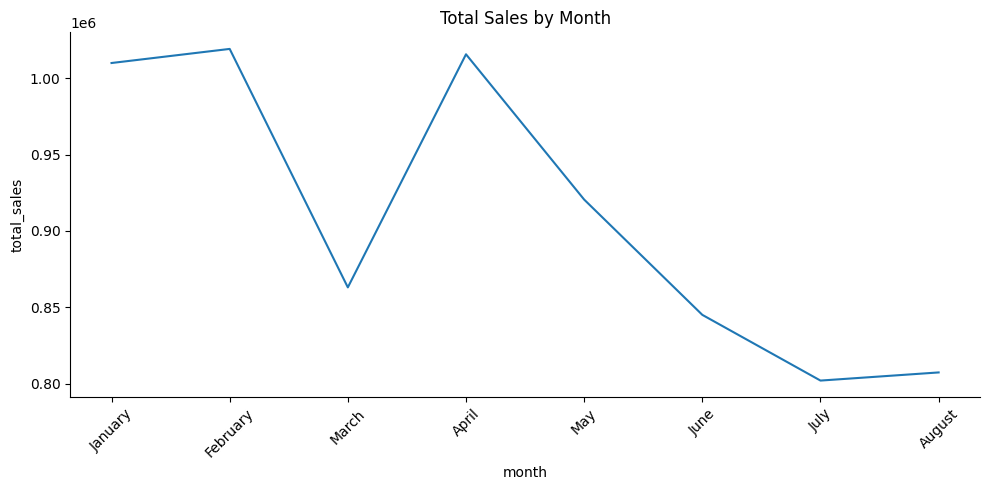

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

sns.relplot(x='month', y='total_sales', data=df, kind='line', height=5, aspect=2, ci=None)
plt.xticks(rotation=45)
plt.title('Total Sales by Month')
plt.tight_layout()
plt.show()

The bar plot below shows the total sales by sales person. The top 3 sales persons are Kelci Walkden, Dennison Crosswaite and Brien Broise.
Also, Wilone O'Kielt has the lowest total sales.

C:\Users\Henry Kwakye\AppData\Local\Temp\ipykernel_23240\684184046.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='total_sales',y='sales_person', kind='bar', data=order, ci= None, height=10, aspect=1.2)


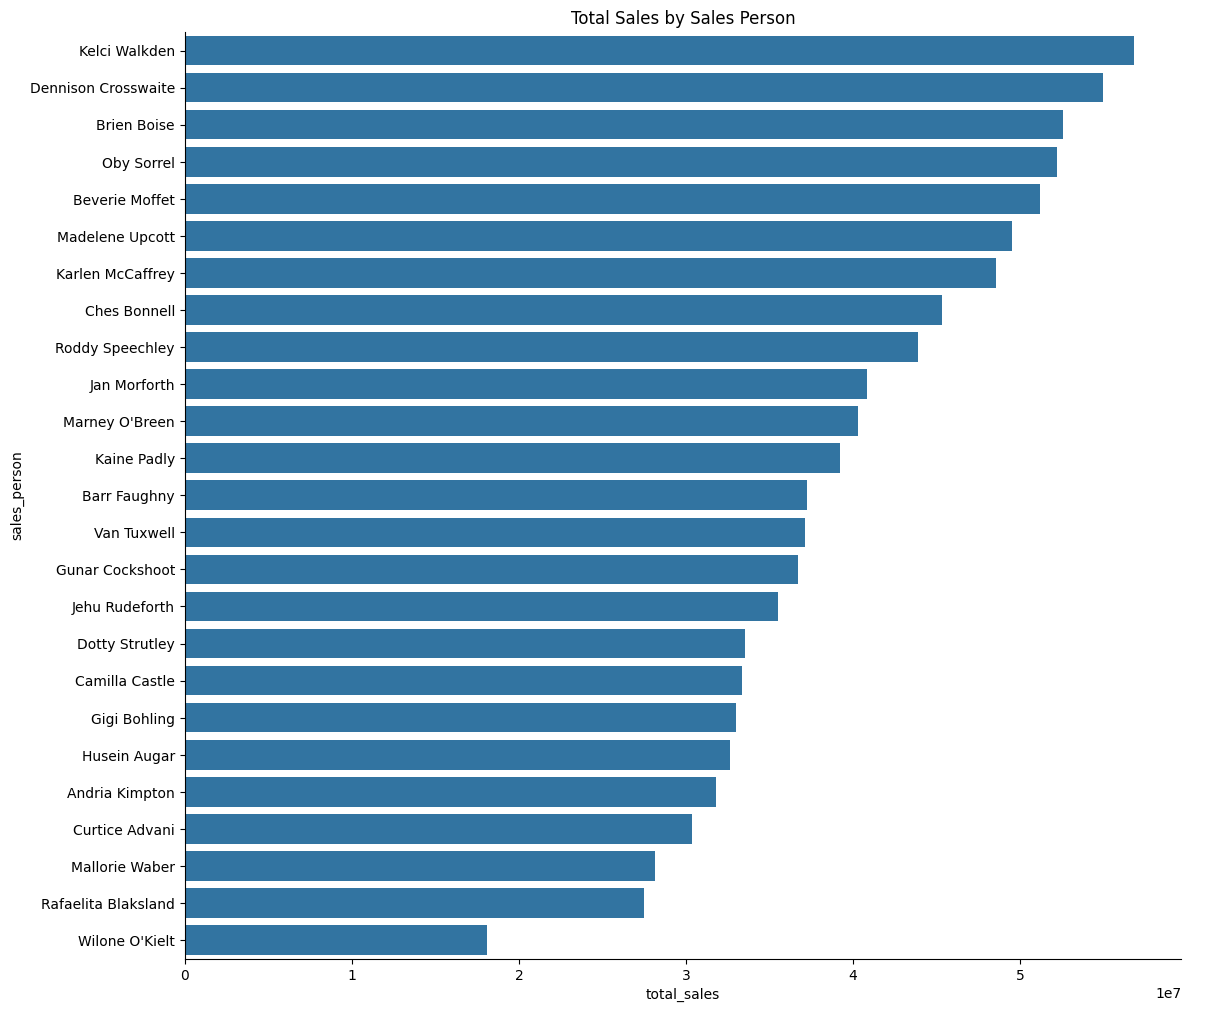

In [174]:
order = df.groupby('sales_person')['total_sales'].sum().sort_values(ascending=False).reset_index()
sns.catplot(x='total_sales',y='sales_person', kind='bar', data=order, ci= None, height=10, aspect=1.2)
plt.title('Total Sales by Sales Person')
plt.show()

The box plot shows many outliers across all months in terms of total sales. These may be naturally occurring and therefore I will skip it for practice sake.

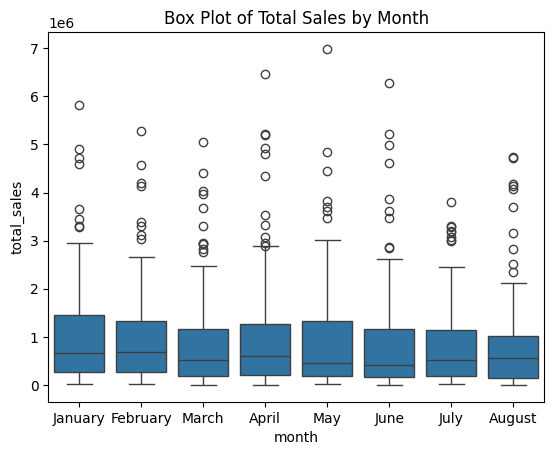

In [175]:
sns.boxplot(x='month', y='total_sales', data=df)
plt.title('Box Plot of Total Sales by Month')
plt.show()

The  bar plot below shows the top selling products, the top 3 are Smooth Silky Salty, 50% Dark Bites and Peanut Butter Cubes.Choco Coated Almonds generate the least amount of money.

C:\Users\Henry Kwakye\AppData\Local\Temp\ipykernel_23240\1817379740.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='total_sales',y='product', kind='bar', data=product_sales, ci= None, height=10, aspect=1.2)


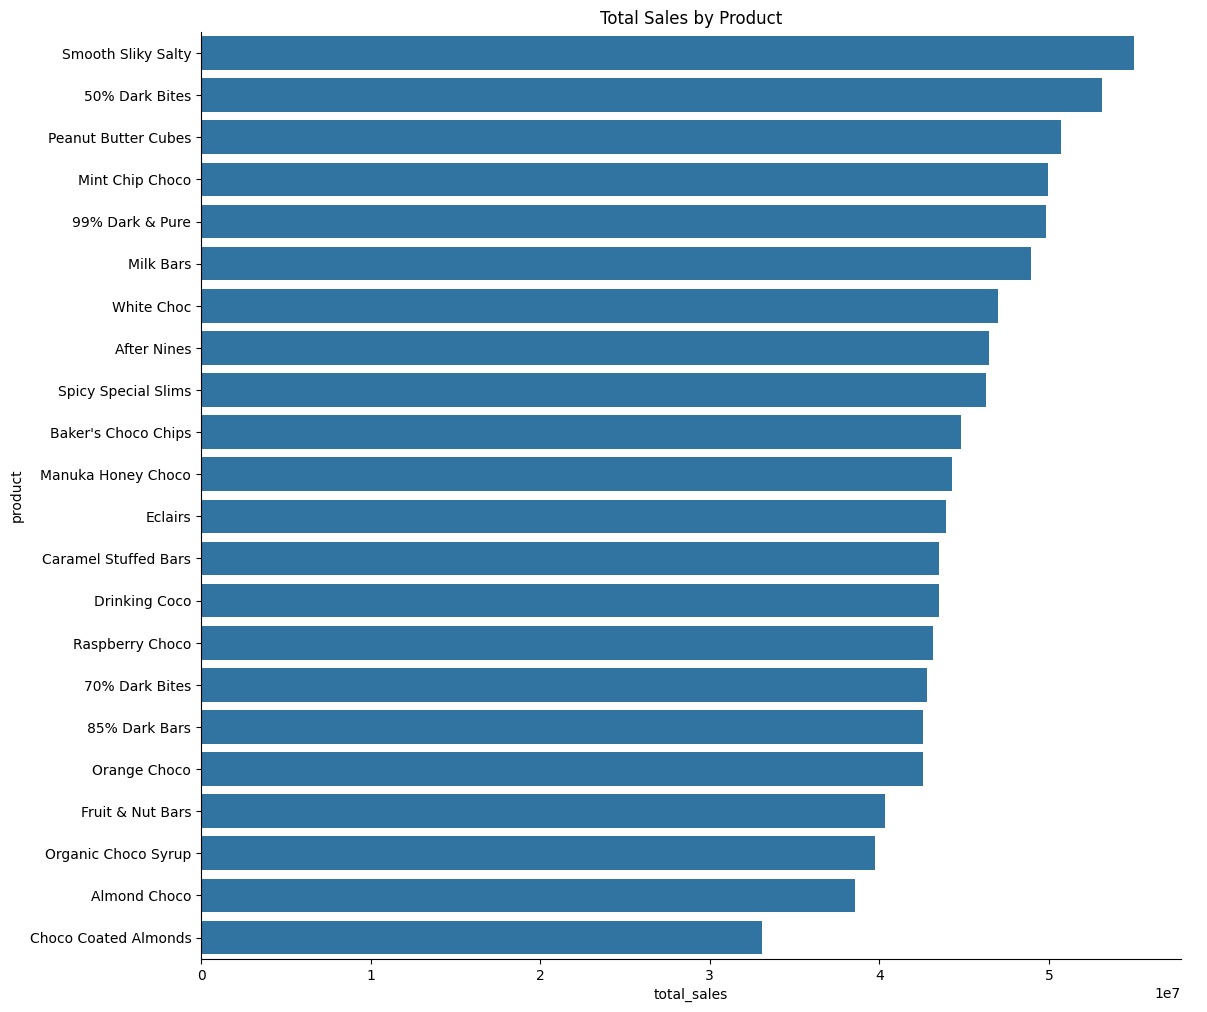

In [176]:
product_sales = df.groupby('product')['total_sales'].sum().sort_values(ascending=False).reset_index()
sns.catplot(x='total_sales',y='product', kind='bar', data=product_sales, ci= None, height=10, aspect=1.2)
plt.title('Total Sales by Product')
plt.show()

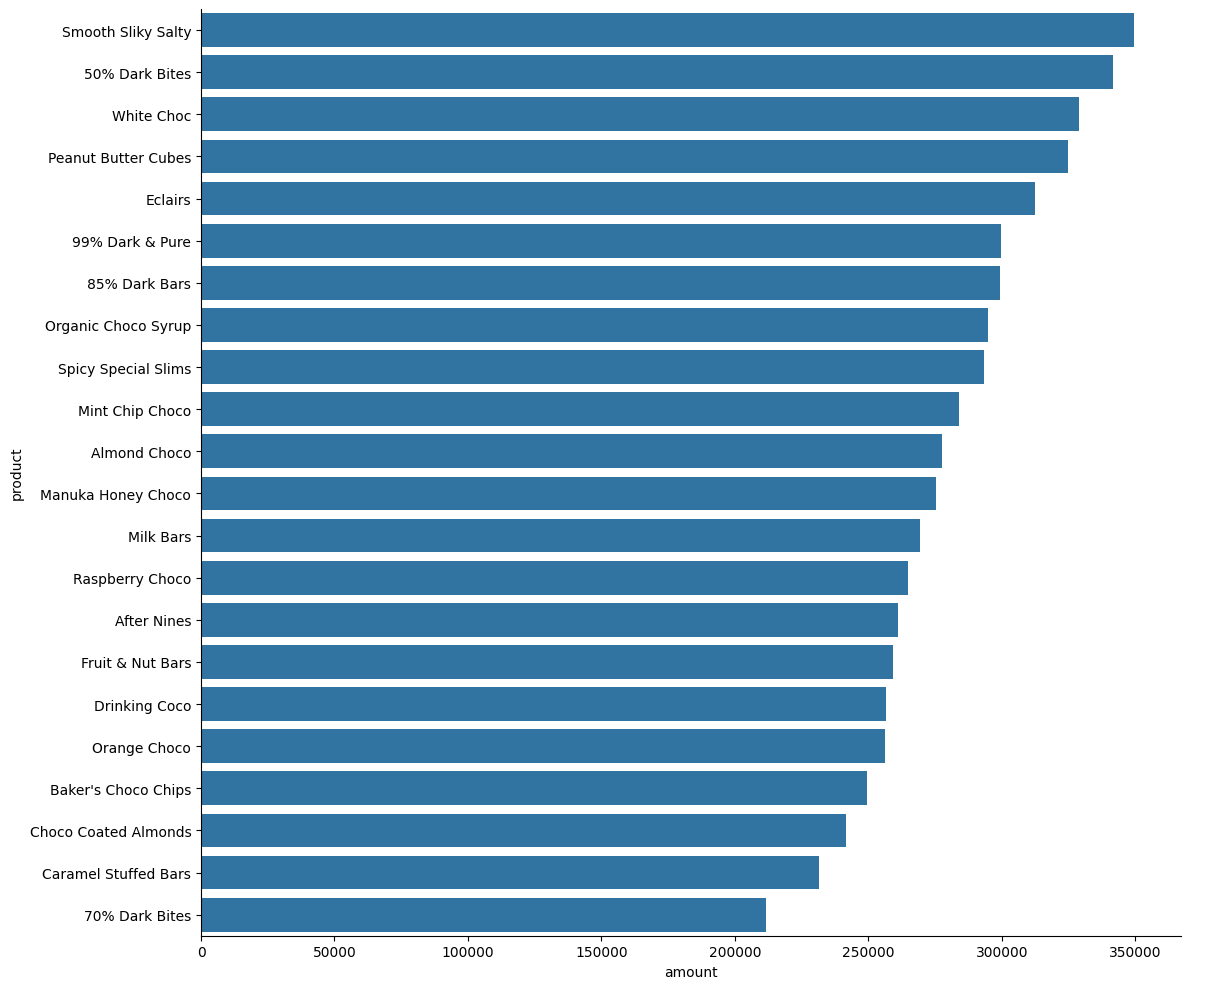

In [ ]:
product_sales = df.groupby('product')['amount'].sum().sort_values(ascending=False).reset_index()
sns.catplot(x='amount',y='product', kind='bar', data=product_sales, errorbar= None, height=10, aspect=1.2)
plt.title('Total Sales by Product')
plt.show()

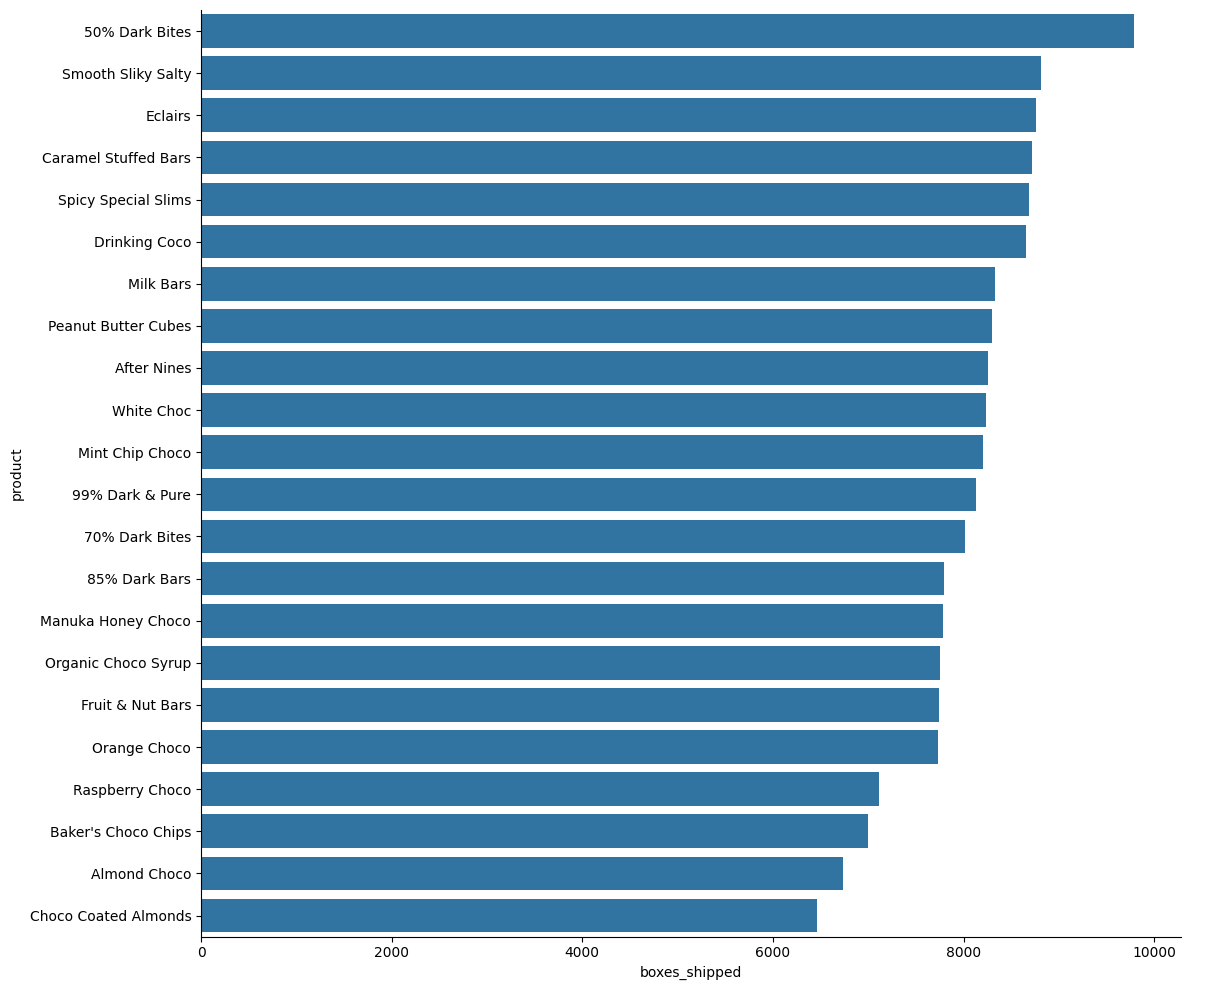

In [144]:
product_sales = df.groupby('product')['boxes_shipped'].sum().sort_values(ascending=False).reset_index()
sns.catplot(x='boxes_shipped',y='product', kind='bar', data=product_sales, errorbar= None, height=10, aspect=1.2)
plt.show()

In [145]:
df['total_sales'].sum()

990237451

In [146]:
correlation = df['boxes_shipped'].corr(df['amount'])
correlation

-0.01882685367583422

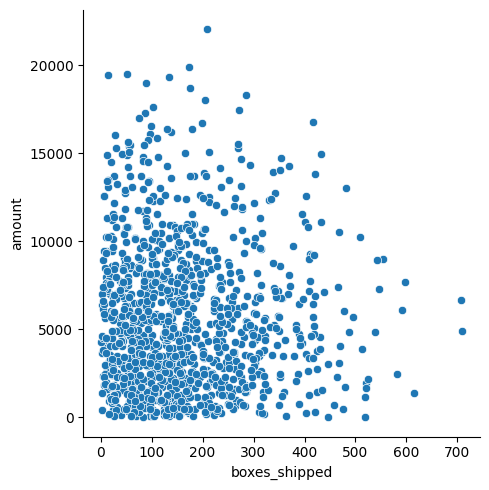

In [147]:
sns.relplot(x='boxes_shipped', y='amount', data=df, kind='scatter')

plt.show()

In [148]:
df.groupby('country')['total_sales'].sum().sort_values(ascending=False).reset_index()

country  total_sales
0    Australia    184053604
1           UK    182383390
2       Canada    169550458
3        India    161657202
4          USA    156291114
5  New Zealand    136301683

In [149]:
df.groupby('country')['boxes_shipped'].sum().sort_values(ascending=False).reset_index()

country  boxes_shipped
0    Australia          32647
1       Canada          31221
2           UK          30265
3        India          29470
4          USA          26824
5  New Zealand          26580

In [150]:
df.groupby('country')['product'].value_counts().sort_values(ascending=False).reset_index()

country               product  count
0      Australia        50% Dark Bites     16
1          India               Eclairs     15
2          India   Spicy Special Slims     14
3    New Zealand       Mint Chip Choco     14
4    New Zealand           After Nines     12
..           ...                   ...    ...
127       Canada       Mint Chip Choco      4
128        India    Manuka Honey Choco      4
129          USA  Choco Coated Almonds      4
130          USA       Mint Chip Choco      4
131  New Zealand  Choco Coated Almonds      3

[132 rows x 3 columns]

In [151]:
df.groupby('country')['product'].unique().value_counts().sort_values(ascending=False).reset_index()

product  count
0  [Peanut Butter Cubes, After Nines, 99% Dark & ...      1
1  [Eclairs, Organic Choco Syrup, Milk Bars, Spic...      1
2  [85% Dark Bars, Peanut Butter Cubes, Smooth Sl...      1
3  [50% Dark Bites, Drinking Coco, Peanut Butter ...      1
4  [Mint Chip Choco, Peanut Butter Cubes, 99% Dar...      1
5  [Orange Choco, Smooth Sliky Salty, Spicy Speci...      1

Are there products that are only sold in specific countries?

In [152]:
# Find products that are sold in only one country
product_countries = df.groupby('product')['country'].nunique().reset_index()
product_countries.columns = ['product', 'num_countries']

# Filter products sold in only one country
exclusive_products = product_countries[product_countries['num_countries'] == 1]
print("Products sold in only one country:")
print(exclusive_products)

Products sold in only one country:
Empty DataFrame
Columns: [product, num_countries]
Index: []


(array([415., 212., 146.,  84.,  75.,  50.,  19.,  20.,  19.,  14.,   9.,
          7.,   4.,   8.,   7.,   1.,   1.,   1.,   1.,   1.]),
 array([5.880000e+02, 3.498530e+05, 6.991180e+05, 1.048383e+06,
        1.397648e+06, 1.746913e+06, 2.096178e+06, 2.445443e+06,
        2.794708e+06, 3.143973e+06, 3.493238e+06, 3.842503e+06,
        4.191768e+06, 4.541033e+06, 4.890298e+06, 5.239563e+06,
        5.588828e+06, 5.938093e+06, 6.287358e+06, 6.636623e+06,
        6.985888e+06]),
 <BarContainer object of 20 artists>)

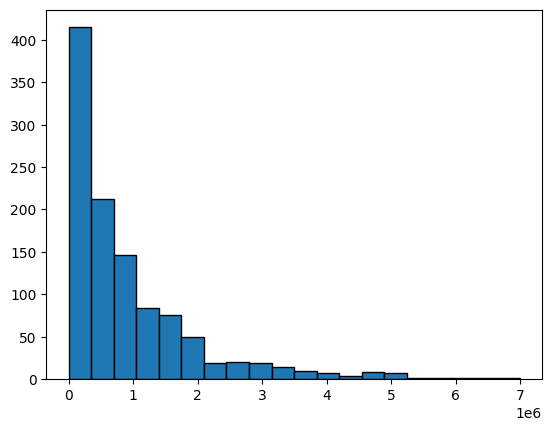

In [153]:
plt.hist(df['total_sales'], bins=20, edgecolor='black')


C:\Users\Henry Kwakye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


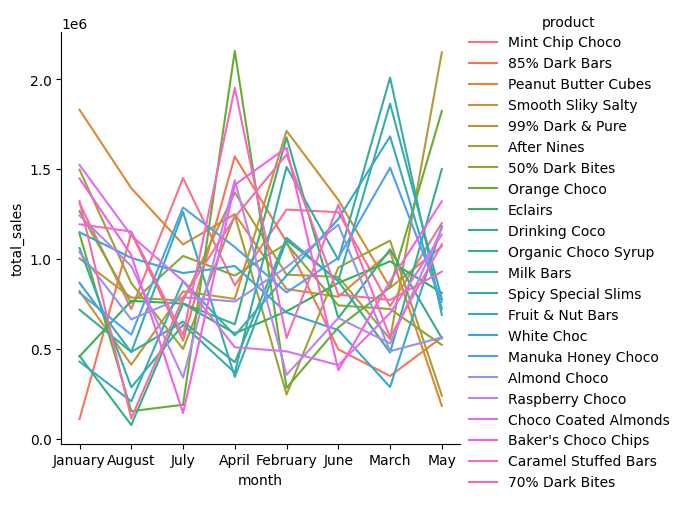

In [154]:
peak_blabla = df.groupby('month')['total_sales'].sum().sort_values(ascending=False).reset_index()
sns.relplot(x='month', y='total_sales', data=df, kind='line', hue= 'product', ci= None)
plt.show()


C:\Users\Henry Kwakye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


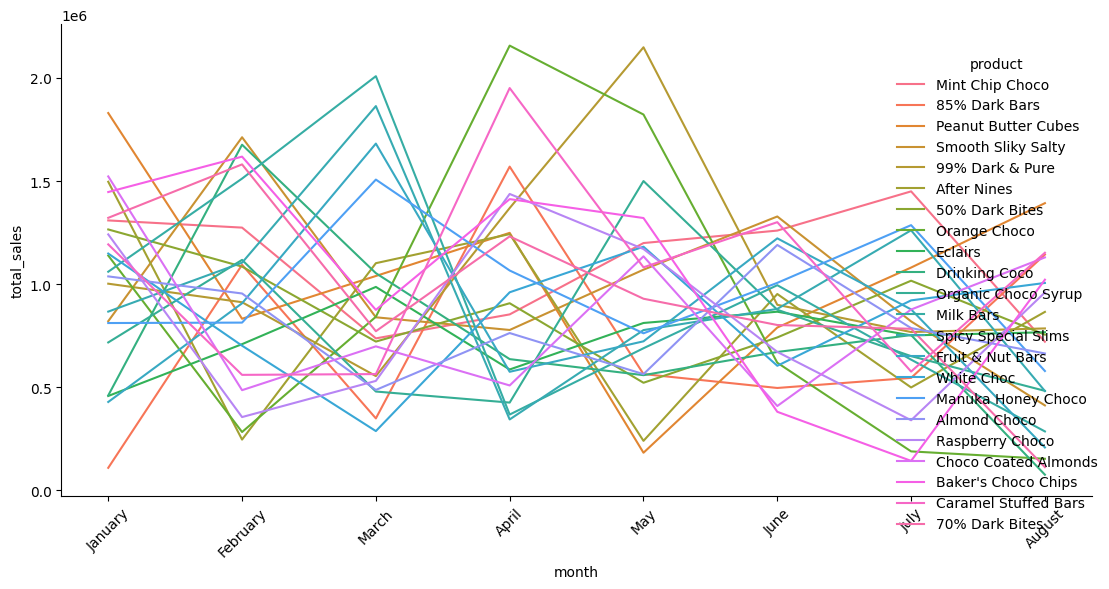

In [155]:
# Create proper month ordering
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert month to categorical with proper order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Plot with proper month ordering
sns.relplot(x='month', y='total_sales', data=df, kind='line', hue='product', 
           ci=None, height=6, aspect=1.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [156]:
# Aggregate by month and product
monthly_product_sales = df.groupby(['month', 'product'])['total_sales'].sum().reset_index()

monthly_product_sales

C:\Users\Henry Kwakye\AppData\Local\Temp\ipykernel_23240\1719743878.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_product_sales = df.groupby(['month', 'product'])['total_sales'].sum().reset_index()


month              product  total_sales
0     January       50% Dark Bites     11389805
1     January       70% Dark Bites      9253132
2     January        85% Dark Bars       109746
3     January      99% Dark & Pure     11028157
4     January          After Nines     11973836
..        ...                  ...          ...
259  December  Peanut Butter Cubes            0
260  December      Raspberry Choco            0
261  December   Smooth Sliky Salty            0
262  December  Spicy Special Slims            0
263  December           White Choc            0

[264 rows x 3 columns]

In [157]:
# Get peak month for each product with ranking
peak_analysis = []

for product in df['product'].unique():
    product_data = monthly_product_sales[monthly_product_sales['product'] == product]
    peak_month = product_data.loc[product_data['total_sales'].idxmax()]
    
    peak_analysis.append({
        'product': product,
        'peak_month': peak_month['month'],
        'peak_sales': peak_month['total_sales']
    })

peak_df = pd.DataFrame(peak_analysis).sort_values('peak_sales', ascending=False)
print("Peak sales months for each product (ranked by peak sales):")
print(peak_df)

Peak sales months for each product (ranked by peak sales):
                 product peak_month  peak_sales
13      Fruit & Nut Bars       June    15891484
7           Orange Choco      April    12941012
4        99% Dark & Pure        May    12892544
1          85% Dark Bars     August    12582164
11             Milk Bars   February    12097015
5            After Nines    January    11973836
19   Baker's Choco Chips    January    11575417
6         50% Dark Bites    January    11389805
3     Smooth Sliky Salty        May    10705079
9          Drinking Coco       July    10548034
0        Mint Chip Choco    January    10474478
10   Organic Choco Syrup       July    10420375
18  Choco Coated Almonds     August    10169943
14            White Choc       July    10138751
17       Raspberry Choco      April    10063613
8                Eclairs      March     9869153
21        70% Dark Bites   February     9486127
2    Peanut Butter Cubes    January     9149686
15    Manuka Honey Choco     

C:\Users\Henry Kwakye\AppData\Local\Temp\ipykernel_23240\1162353691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=peak_months_per_product, x='total_sales', y='product', palette='viridis')


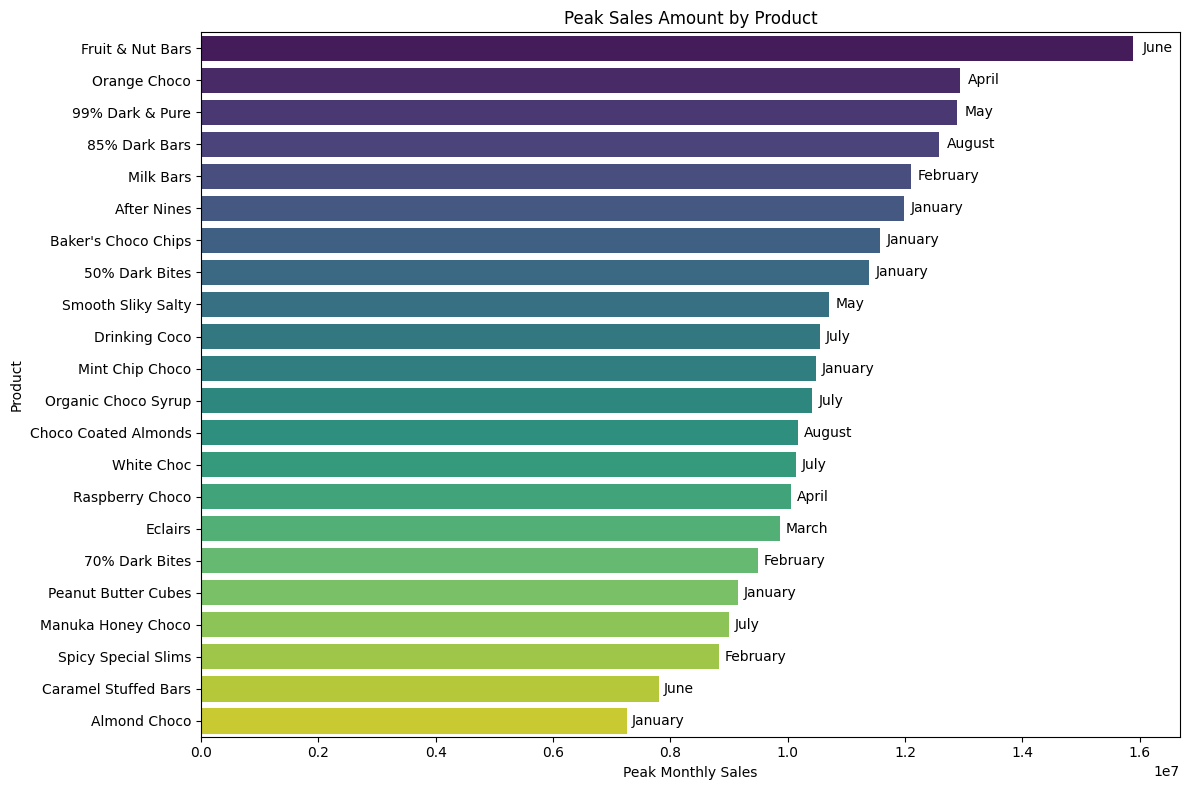

In [158]:
# Create a bar chart showing peak months for each product
plt.figure(figsize=(12, 8))
sns.barplot(data=peak_months_per_product, x='total_sales', y='product', palette='viridis')
plt.title('Peak Sales Amount by Product')
plt.xlabel('Peak Monthly Sales')
plt.ylabel('Product')

# Add month labels to the bars
for i, (product, month, sales) in enumerate(peak_months_per_product.values):
    plt.text(sales + sales*0.01, i, f'{month}', va='center', fontsize=10)

plt.tight_layout()
plt.show()